# CIV1535 assignment4: lowry model

# name: YIFAN LI
# number: 1006506997

# Model preparation

In [0]:
import numpy as np
import pandas as pd
import math

In [209]:
location=[]
distance=pd.DataFrame(columns=range(1,10),index=range(1,10))
for i in range(1,4):
  for j in range(1,4):
    location.append([i,j])#generate the locations for 9 grids
for i in range(1,10):
  for j in range(1,10):
    if i!=j:
      distance[i][j]=(abs(location[i-1][0]-location[j-1][0])+abs(location[i-1][1]-location[j-1][1]))*5
    else:
      distance[i][j]=2.5 #calculate the distance between grids
distance

,1,2,3,4,5,6,7,8,9
1,2.5,5,10,5,10,15,10,15,20
2,5,2.5,5,10,5,10,15,10,15
3,10,5,2.5,15,10,5,20,15,10
4,5,10,15,2.5,5,10,5,10,15
5,10,5,10,5,2.5,5,10,5,10
6,15,10,5,10,5,2.5,15,10,5
7,10,15,20,5,10,15,2.5,5,10
8,15,10,15,10,5,10,5,2.5,5
9,20,15,10,15,10,5,10,5,2.5


In [210]:
T=((distance/30)*60)**1.5 #transfer distance into impedance
T

,1,2,3,4,5,6,7,8,9
1,11.1803,31.6228,89.4427,31.6228,89.4427,164.317,89.4427,164.317,252.982
2,31.6228,11.1803,31.6228,89.4427,31.6228,89.4427,164.317,89.4427,164.317
3,89.4427,31.6228,11.1803,164.317,89.4427,31.6228,252.982,164.317,89.4427
4,31.6228,89.4427,164.317,11.1803,31.6228,89.4427,31.6228,89.4427,164.317
5,89.4427,31.6228,89.4427,31.6228,11.1803,31.6228,89.4427,31.6228,89.4427
6,164.317,89.4427,31.6228,89.4427,31.6228,11.1803,164.317,89.4427,31.6228
7,89.4427,164.317,252.982,31.6228,89.4427,164.317,11.1803,31.6228,89.4427
8,164.317,89.4427,164.317,89.4427,31.6228,89.4427,31.6228,11.1803,31.6228
9,252.982,164.317,89.4427,164.317,89.4427,31.6228,89.4427,31.6228,11.1803


In [0]:
Ejb=np.array([0,25000,0,0,0,0,0,25000,0])
Aj=np.array([25,25,25,25,25,25,25,25,25])
Ajb=np.array([0,6,0,0,0,0,0,6,0])
ZjH=np.array([800,800,800,800,800,800,800,800,800])
A=Aj-Ajb #Area for household and retail

In [0]:
def pop(Ej): #define the function to calculate population distribution basing on employment
  N=sum(Ej)*1.1
  n0=[]
  for j in range(9):
    temp1=0
    for i in range(9):
      temp1+=Ej[i]/T[i+1][j+1]
    n0.append(temp1)
  ns=sum(n0)
  Nj=np.array(n0)*N/ns
  return Nj



In [0]:
def emp(Nj):  #define the function to calculate employment distribution basing on population
  Ek=Nj.sum()*np.array([0.2,0.15])
  e0=[]
  for j in range(9):
    temp1=0
    for i in range(9):
      temp1+=0.2*Nj[i]/T[i+1][j+1]
    e0.append(temp1)
  es=sum(e0)
  Ej1=Ek[0]*(np.array(e0)+0.1*Ejb)/(es+0.1*Ejb)
  e0=[]
  for j in range(9):
    temp1=0
    for i in range(9):
      temp1+=0.15*Nj[i]/T[i+1][j+1]
    e0.append(temp1)
  es=sum(e0)
  Ej2=Ek[1]*(np.array(e0)+0.05*Ejb)/(es+0.05*Ejb)
  return Ej1,Ej2

# 1st iteration

In [214]:
#Let's start 1st iteration!


Nj1=pop(Ejb) #1st pop distribution
AjH1=A  #in this time we do not have retail area
print("Population distribution in 1 iter")
print(Nj1)
print("compare the proportioned Nj with Nj(max)")
print(ZjH*AjH1-Nj1) #check household density


Ejk1=emp(Nj1)# 1st retail employment distribution
print("Retail employment distribution in 1 iter")
print(Ejk1)
print("compare the proportioned Ejk with Zk")
print(Ejk1[0]-250,Ejk1[1]-350) #check minimum employment size


Ej1=Ejk1[1]+Ejk1[0]+Ejb #in each grid there are employment from basic,retail1 and retail2
print("the final over all employment: Ejb+Ejk1")
print(Ej1)
print("compare the employment increment")
print(Ej1-Ejb)
print(Ejb) #obviously, there is a huge change in this iter

Population distribution in 1 iter
[ 4508.17073522 12029.77932815  4508.17073522  2673.28429514
  7561.18981254  2673.28429514  4508.17073522 12029.77932815
  4508.17073522]
compare the proportioned Nj with Nj(max)
[15491.82926478  3170.22067185 15491.82926478 17326.71570486
 12438.81018746 17326.71570486 15491.82926478  3170.22067185
 15491.82926478]
Retail employment distribution in 1 iter
(array([1031.09186696, 6343.15846742, 1031.09186696,  992.24891706,
       1605.77935336,  992.24891706, 1031.09186696, 6343.15846742,
       1031.09186696]), array([ 773.31890022, 4054.92975404,  773.31890022,  744.1866878 ,
       1204.33451502,  744.1866878 ,  773.31890022, 4054.92975404,
        773.31890022]))
compare the proportioned Ejk with Zk
[ 781.09186696 6093.15846742  781.09186696  742.24891706 1355.77935336
  742.24891706  781.09186696 6093.15846742  781.09186696] [ 423.31890022 3704.92975404  423.31890022  394.1866878   854.33451502
  394.1866878   423.31890022 3704.92975404  423.3189

# 2nd iteration

In [215]:
#Let's start 2nd iteration!
Ajk1=[Ejk1[0]*0.0015,Ejk1[1]*0.0025]
print(Ajk1) #make sure the area of k=2 larger than k=1
AjH2=A-Ajk1[0]-Ajk1[1] #new household area in 2nd iter
print(AjH2) # I found some retail area exceed the limit, so after adjustment, set Ah as 0
AjH2[1]=0
AjH2[7]=0

Nj2=pop(Ej1) #2nd pop distribution
print("Population distribution in 2 iter")
print(Nj2)
print("compare the proportioned Nj with Nj(max)")
print(ZjH*AjH2) #check household density

[array([1.5466378 , 9.5147377 , 1.5466378 , 1.48837338, 2.40866903,
       1.48837338, 1.5466378 , 9.5147377 , 1.5466378 ]), array([ 1.93329725, 10.13732439,  1.93329725,  1.86046672,  3.01083629,
        1.86046672,  1.93329725, 10.13732439,  1.93329725])]
[21.52006495 -0.65206209 21.52006495 21.6511599  19.58049468 21.6511599
 21.52006495 -0.65206209 21.52006495]
Population distribution in 2 iter
[ 7891.69299236 18402.49548141  7891.69299236  5730.02699768
 12894.66812107  5730.02699768  7891.69299236 18402.49548141
  7891.69299236]
compare the proportioned Nj with Nj(max)
[17216.05195921     0.         17216.05195921 17320.92792394
 15664.39574594 17320.92792394 17216.05195921     0.
 17216.05195921]


In [216]:
Nj2[1]=0
Nj2[7]=0 #since the household have no area, adjust Nj to 0.

Ejk2=emp(Nj2)# 2nd retail employment distribution
print("Retail employment distribution in 2 iter")
print(Ejk2)
print("compare the proportioned Ejk with Zk")
print(Ejk2[0]-250,Ejk2[1]-350) #check minimum employment size

Ej2=Ejk2[1]+Ejk2[0]+Ejb #in each grid there are employment from basic,retail1 and retail2
print("the final over all employment: Ejb+Ejk1")
print(Ej2)
print("compare the employment increment")
for i in range(9):
  print((Ej2[i]-Ej1[i])/Ej1[i]) #obviously, there is still a large change in this iter

Retail employment distribution in 2 iter
(array([1150.28163481, 6126.38488175, 1150.28163481, 1426.4000449 ,
       1687.52441552, 1426.4000449 , 1150.28163481, 6126.38488175,
       1150.28163481]), array([ 862.71122611, 3831.88303139,  862.71122611, 1069.80003367,
       1265.64331164, 1069.80003367,  862.71122611, 3831.88303139,
        862.71122611]))
compare the proportioned Ejk with Zk
[ 900.28163481 5876.38488175  900.28163481 1176.4000449  1437.52441552
 1176.4000449   900.28163481 5876.38488175  900.28163481] [ 512.71122611 3481.88303139  512.71122611  719.80003367  915.64331164
  719.80003367  512.71122611 3481.88303139  512.71122611]
the final over all employment: Ejb+Ejk1
[ 2012.99286092 34958.26791314  2012.99286092  2496.20007857
  2953.16772717  2496.20007857  2012.99286092 34958.26791314
  2012.99286092]
compare the employment increment
0.11559568228117606
-0.012424973506275739
0.1155956822811762
0.4375425564832397
0.050906783672805475
0.43754255648323986
0.115595682281

# 3rd iteration

In [217]:
#Let's start 3rd iteration!
Ajk2=[Ejk2[0]*0.0015,Ejk2[1]*0.0025]
print(Ajk2) #make sure the area of k=2 larger than k=1
AjH3=A-Ajk2[0]-Ajk2[1] #new household area in 3rd iter
print(AjH3) # area of household

Nj3=pop(Ej2) #3rd pop distribution
print("Population distribution in 3 iter")
print(Nj3)
print("compare the proportioned Nj with Nj(max)")
print(ZjH*AjH3) #check household density

[array([1.72542245, 9.18957732, 1.72542245, 2.13960007, 2.53128662,
       2.13960007, 1.72542245, 9.18957732, 1.72542245]), array([2.15677807, 9.57970758, 2.15677807, 2.67450008, 3.16410828,
       2.67450008, 2.15677807, 9.57970758, 2.15677807])]
[21.11779948  0.2307151  21.11779948 20.18589985 19.3046051  20.18589985
 21.11779948  0.2307151  21.11779948]
Population distribution in 3 iter
[ 8080.36050457 18384.22397478  8080.36050457  6153.07133724
 13109.45002739  6153.07133724  8080.36050457 18384.22397478
  8080.36050457]
compare the proportioned Nj with Nj(max)
[16894.239586     184.57207912 16894.239586   16148.71987877
 15443.68407809 16148.71987877 16894.239586     184.57207912
 16894.239586  ]


In [218]:
Nj3[1]=184
Nj3[7]=184 #adjust Nj to Nmax

Ejk3=emp(Nj3)# 3rd retail employment distribution
print("Retail employment distribution in 3 iter")
print(Ejk3)
print("compare the proportioned Ejk with Zk")
print(Ejk3[0]-250,Ejk3[1]-350) #check minimum employment size

Ej3=Ejk3[1]+Ejk3[0]+Ejb #in each grid there are employment from basic,retail1 and retail2
print("the final over all employment: Ejb+Ejk1")
print(Ej3)
print("compare the employment increment")
for i in range(9):
  print((Ej3[i]-Ej2[i])/Ej2[i]) #still need iteration

Retail employment distribution in 3 iter
(array([1192.43870673, 6265.61741416, 1192.43870673, 1487.03436212,
       1746.56936526, 1487.03436212, 1192.43870673, 6265.61741416,
       1192.43870673]), array([ 894.32903005, 3910.02531312,  894.32903005, 1115.27577159,
       1309.92702394, 1115.27577159,  894.32903005, 3910.02531312,
        894.32903005]))
compare the proportioned Ejk with Zk
[ 942.43870673 6015.61741416  942.43870673 1237.03436212 1496.56936526
 1237.03436212  942.43870673 6015.61741416  942.43870673] [ 544.32903005 3560.02531312  544.32903005  765.27577159  959.92702394
  765.27577159  544.32903005 3560.02531312  544.32903005]
the final over all employment: Ejb+Ejk1
[ 2086.76773678 35175.64272728  2086.76773678  2602.31013371
  3056.4963892   2602.31013371  2086.76773678 35175.64272728
  2086.76773678]
compare the employment increment
0.03664934798575133
0.006218123125466921
0.03664934798575133
0.04250863384053754
0.034989093605039254
0.04250863384053754
0.03664934798

# 4th iteration

In [219]:
#Let's start 4th iteration!
Ajk3=[Ejk3[0]*0.0015,Ejk3[1]*0.0025]
print(Ajk3) #make sure the area of k=2 larger than k=1
AjH4=A-Ajk3[0]-Ajk3[1] #new household area in 4th iter
print(AjH4) # I found some retail area exceed the limit, so after adjustment, set Ah as 0

AjH4[1]=0
AjH4[7]=0

Nj4=pop(Ej3) #4th pop distribution
print("Population distribution in 4 iter")
print(Nj4)
print("compare the proportioned Nj with Nj(max)")
print(ZjH*AjH4) #check household density

[array([1.78865806, 9.39842612, 1.78865806, 2.23055154, 2.61985405,
       2.23055154, 1.78865806, 9.39842612, 1.78865806]), array([2.23582258, 9.77506328, 2.23582258, 2.78818943, 3.27481756,
       2.78818943, 2.23582258, 9.77506328, 2.23582258])]
[20.97551936 -0.1734894  20.97551936 19.98125903 19.10532839 19.98125903
 20.97551936 -0.1734894  20.97551936]
Population distribution in 4 iter
[ 8187.1595594  18546.63302828  8187.1595594   6271.46335229
 13270.58936537  6271.46335229  8187.1595594  18546.63302828
  8187.1595594 ]
compare the proportioned Nj with Nj(max)
[16780.41549183     0.         16780.41549183 15985.00722228
 15284.2627138  15985.00722228 16780.41549183     0.
 16780.41549183]


In [220]:
Nj4[1]=0
Nj4[7]=0 #since the household have no area, adjust Nj to 0.

Ejk4=emp(Nj4)# 4th retail employment distribution
print("Retail employment distribution in 4 iter")
print(Ejk4)
print("compare the proportioned Ejk with Zk")
print(Ejk4[0]-250,Ejk4[1]-350) #check minimum employment size

Ej4=Ejk4[1]+Ejk4[0]+Ejb #in each grid there are employment from basic,retail1 and retail2
print("the final over all employment: Ejb+Ejk1")
print(Ej4)
print("compare the employment increment")
for i in range(9):
  print((Ej4[i]-Ej3[i])/Ej3[i]) #obviously, there is still a large change in this iter

Retail employment distribution in 4 iter
(array([1203.27116591, 6289.29830139, 1203.27116591, 1506.2952619 ,
       1760.55459912, 1506.2952619 , 1203.27116591, 6289.29830139,
       1203.27116591]), array([ 902.45337443, 3921.48922099,  902.45337443, 1129.72144643,
       1320.41594934, 1129.72144643,  902.45337443, 3921.48922099,
        902.45337443]))
compare the proportioned Ejk with Zk
[ 953.27116591 6039.29830139  953.27116591 1256.2952619  1510.55459912
 1256.2952619   953.27116591 6039.29830139  953.27116591] [ 552.45337443 3571.48922099  552.45337443  779.72144643  970.41594934
  779.72144643  552.45337443 3571.48922099  552.45337443]
the final over all employment: Ejb+Ejk1
[ 2105.72454034 35210.78752238  2105.72454034  2636.01670833
  3080.97054845  2636.01670833  2105.72454034 35210.78752238
  2105.72454034]
compare the employment increment
0.009084290133544443
0.0009991230403757895
0.009084290133544224
0.012952558646897448
0.00800725933711908
0.012952558646897623
0.0090842

# 5th iteration

In [221]:
#Let's start 5th iteration!
Ajk4=[Ejk4[0]*0.0015,Ejk4[1]*0.0025]
print(Ajk4) #make sure the area of k=2 larger than k=1
AjH5=A-Ajk4[0]-Ajk4[1] #new household area in 5th iter
print(AjH5) # I found some retail area exceed the limit, so after adjustment, set Ah as 0

AjH5[1]=0
AjH5[7]=0

Nj5=pop(Ej4) #5th pop distribution
print("Population distribution in 5 iter")
print(Nj5)
print("compare the proportioned Nj with Nj(max)")
print(ZjH*AjH5) #check household density

[array([1.80490675, 9.43394745, 1.80490675, 2.25944289, 2.6408319 ,
       2.25944289, 1.80490675, 9.43394745, 1.80490675]), array([2.25613344, 9.80372305, 2.25613344, 2.82430362, 3.30103987,
       2.82430362, 2.25613344, 9.80372305, 2.25613344])]
[20.93895982 -0.2376705  20.93895982 19.91625349 19.05812823 19.91625349
 20.93895982 -0.2376705  20.93895982]
Population distribution in 5 iter
[ 8211.94593184 18578.80838057  8211.94593184  6302.49733461
 13306.82973063  6302.49733461  8211.94593184 18578.80838057
  8211.94593184]
compare the proportioned Nj with Nj(max)
[16751.16785205     0.         16751.16785205 15933.00279286
 15246.50258239 15933.00279286 16751.16785205     0.
 16751.16785205]


In [222]:
Nj5[1]=0
Nj5[7]=0 #since the household have no area, adjust Nj to 0.

Ejk5=emp(Nj5)# 5th retail employment distribution
print("Retail employment distribution in 4 iter")
print(Ejk5)
print("compare the proportioned Ejk with Zk")
print(Ejk5[0]-250,Ejk5[1]-350) #check minimum employment size

Ej5=Ejk5[1]+Ejk5[0]+Ejb #in each grid there are employment from basic,retail1 and retail2
print("the final over all employment: Ejb+Ejk1")
print(Ej5)
print("compare the employment increment")
for i in range(9):
  print((Ej5[i]-Ej4[i])/Ej4[i]) #converge to 0.5%

Retail employment distribution in 4 iter
(array([1207.27973333, 6301.38295852, 1207.27973333, 1511.83177481,
       1766.24776974, 1511.83177481, 1207.27973333, 6301.38295852,
       1207.27973333]), array([ 905.4598    , 3928.17249994,  905.4598    , 1133.87383111,
       1324.6858273 , 1133.87383111,  905.4598    , 3928.17249994,
        905.4598    ]))
compare the proportioned Ejk with Zk
[ 957.27973333 6051.38295852  957.27973333 1261.83177481 1516.24776974
 1261.83177481  957.27973333 6051.38295852  957.27973333] [ 555.4598     3578.17249994  555.4598      783.87383111  974.6858273
  783.87383111  555.4598     3578.17249994  555.4598    ]
the final over all employment: Ejb+Ejk1
[ 2112.73953333 35229.55545846  2112.73953333  2645.70560592
  3090.93359704  2645.70560592  2112.73953333 35229.55545846
  2112.73953333]
compare the employment increment
0.003331391573133444
0.0005330166519194001
0.0033313915731336607
0.0036755827701001123
0.0032337370430214297
0.0036755827700997667
0.003

# Return the model with the impedance function parameter set equal to 1.00

In [223]:
T=((distance/30)*60)**1 #transfer distance into new impedance
T

,1,2,3,4,5,6,7,8,9
1,5,10,20,10,20,30,20,30,40
2,10,5,10,20,10,20,30,20,30
3,20,10,5,30,20,10,40,30,20
4,10,20,30,5,10,20,10,20,30
5,20,10,20,10,5,10,20,10,20
6,30,20,10,20,10,5,30,20,10
7,20,30,40,10,20,30,5,10,20
8,30,20,30,20,10,20,10,5,10
9,40,30,20,30,20,10,20,10,5


In [224]:
#Let's start 1st iteration!


Nj1=pop(Ejb) #1st pop distribution
AjH1=A  #in this time we do not have retail area
print("Population distribution in 1 iter")
print(Nj1)
print("compare the proportioned Nj with Nj(max)")
print(ZjH*AjH1-Nj1) #check household density


Ejk1=emp(Nj1)# 1st retail employment distribution
print("Retail employment distribution in 1 iter")
print(Ejk1)
print("compare the proportioned Ejk with Zk")
print(Ejk1[0]-250,Ejk1[1]-350) #check minimum employment size


Ej1=Ejk1[1]+Ejk1[0]+Ejb #in each grid there are employment from basic,retail1 and retail2
print("the final over all employment: Ejb+Ejk1")
print(Ej1)
print("compare the employment increment")
print(Ej1-Ejb)
print(Ejb) #obviously, there is a huge change in this iter

Population distribution in 1 iter
[5116.27906977 9593.02325581 5116.27906977 3837.20930233 7674.41860465
 3837.20930233 5116.27906977 9593.02325581 5116.27906977]
compare the proportioned Nj with Nj(max)
[14883.72093023  5606.97674419 14883.72093023 16162.79069767
 12325.58139535 16162.79069767 14883.72093023  5606.97674419
 14883.72093023]
Retail employment distribution in 1 iter
(array([1095.73879358, 3754.33965131, 1095.73879358, 1156.613171  ,
       1497.50968456, 1156.613171  , 1095.73879358, 3754.33965131,
       1095.73879358]), array([ 821.80409519, 2332.50093064,  821.80409519,  867.45987825,
       1123.13226342,  867.45987825,  821.80409519, 2332.50093064,
        821.80409519]))
compare the proportioned Ejk with Zk
[ 845.73879358 3504.33965131  845.73879358  906.613171   1247.50968456
  906.613171    845.73879358 3504.33965131  845.73879358] [ 471.80409519 1982.50093064  471.80409519  517.45987825  773.13226342
  517.45987825  471.80409519 1982.50093064  471.80409519]
the 

In [225]:
#Let's start 2nd iteration!
Ajk1=[Ejk1[0]*0.0015,Ejk1[1]*0.0025]
print(Ajk1) #make sure the area of k=2 larger than k=1
AjH2=A-Ajk1[0]-Ajk1[1] #new household area in 2nd iter
print(AjH2) # 

Nj2=pop(Ej1) #2nd pop distribution
print("Population distribution in 2 iter")
print(Nj2)
print("compare the proportioned Nj with Nj(max)")
print(ZjH*AjH2) #check household density

[array([1.64360819, 5.63150948, 1.64360819, 1.73491976, 2.24626453,
       1.73491976, 1.64360819, 5.63150948, 1.64360819]), array([2.05451024, 5.83125233, 2.05451024, 2.1686497 , 2.80783066,
       2.1686497 , 2.05451024, 5.83125233, 2.05451024])]
[21.30188157  7.5372382  21.30188157 21.09643055 19.94590481 21.09643055
 21.30188157  7.5372382  21.30188157]
Population distribution in 2 iter
[ 7985.82180788 13514.39149195  7985.82180788  6779.36264577
 11633.10933501  6779.36264577  7985.82180788 13514.39149195
  7985.82180788]
compare the proportioned Nj with Nj(max)
[17041.50525733  6029.79055716 17041.50525733 16877.1444383
 15956.72385169 16877.1444383  17041.50525733  6029.79055716
 17041.50525733]


In [226]:
Nj2[1]=6029
Nj2[7]=6029 #sadjust Nj to Nmax.

Ejk2=emp(Nj2)# 2nd retail employment distribution
print("Retail employment distribution in 2 iter")
print(Ejk2)
print("compare the proportioned Ejk with Zk")
print(Ejk2[0]-250,Ejk2[1]-350) #check minimum employment size

Ej2=Ejk2[1]+Ejk2[0]+Ejb #in each grid there are employment from basic,retail1 and retail2
print("the final over all employment: Ejb+Ejk1")
print(Ej2)
print("compare the employment increment")
for i in range(9):
  print((Ej2[i]-Ej1[i])/Ej1[i]) #obviously, there is still a large change in this iter

Retail employment distribution in 2 iter
(array([1403.57958873, 4101.26825845, 1403.57958873, 1606.37299381,
       1863.4955467 , 1606.37299381, 1403.57958873, 4101.26825845,
       1403.57958873]), array([1052.68469155, 2537.33691851, 1052.68469155, 1204.77974536,
       1397.62166002, 1204.77974536, 1052.68469155, 2537.33691851,
       1052.68469155]))
compare the proportioned Ejk with Zk
[1153.57958873 3851.26825845 1153.57958873 1356.37299381 1613.4955467
 1356.37299381 1153.57958873 3851.26825845 1153.57958873] [ 702.68469155 2187.33691851  702.68469155  854.77974536 1047.62166002
  854.77974536  702.68469155 2187.33691851  702.68469155]
the final over all employment: Ejb+Ejk1
[ 2456.26428027 31638.60517696  2456.26428027  2811.15273917
  3261.11720672  2811.15273917  2456.26428027 31638.60517696
  2456.26428027]
compare the employment increment
0.28094359435835153
0.01774913708442626
0.28094359435835153
0.38885933005811996
0.24439632405014577
0.38885933005811996
0.28094359435835

In [227]:
#Let's start 3rd iteration!
Ajk2=[Ejk2[0]*0.0015,Ejk2[1]*0.0025]
print(Ajk2) #make sure the area of k=2 larger than k=1
AjH3=A-Ajk2[0]-Ajk2[1] #new household area in 3rd iter
print(AjH3) # area of household

Nj3=pop(Ej2) #3rd pop distribution
print("Population distribution in 3 iter")
print(Nj3)
print("compare the proportioned Nj with Nj(max)")
print(ZjH*AjH3) #check household density

[array([2.10536938, 6.15190239, 2.10536938, 2.40955949, 2.79524332,
       2.40955949, 2.10536938, 6.15190239, 2.10536938]), array([2.63171173, 6.3433423 , 2.63171173, 3.01194936, 3.49405415,
       3.01194936, 2.63171173, 6.3433423 , 2.63171173])]
[20.26291889  6.50475532 20.26291889 19.57849115 18.71070253 19.57849115
 20.26291889  6.50475532 20.26291889]
Population distribution in 3 iter
[ 8593.75957137 14190.10227978  8593.75957137  7500.1258785
 12428.76457405  7500.1258785   8593.75957137 14190.10227978
  8593.75957137]
compare the proportioned Nj with Nj(max)
[16210.33511044  5203.80425285 16210.33511044 15662.7929167
 14968.56202392 15662.7929167  16210.33511044  5203.80425285
 16210.33511044]


In [228]:
Nj3[1]=5203
Nj3[7]=5203 #adjust Nj to Nmax

Ejk3=emp(Nj3)# 3rd retail employment distribution
print("Retail employment distribution in 3 iter")
print(Ejk3)
print("compare the proportioned Ejk with Zk")
print(Ejk3[0]-250,Ejk3[1]-350) #check minimum employment size

Ej3=Ejk3[1]+Ejk3[0]+Ejb #in each grid there are employment from basic,retail1 and retail2
print("the final over all employment: Ejb+Ejk1")
print(Ej3)
print("compare the employment increment")
for i in range(9):
  print((Ej3[i]-Ej2[i])/Ej2[i]) #still need iteration

Retail employment distribution in 3 iter
(array([1469.32555307, 4165.14048455, 1469.32555307, 1705.68652215,
       1940.18814487, 1705.68652215, 1469.32555307, 4165.14048455,
       1469.32555307]), array([1101.9941648 , 2575.26617721, 1101.9941648 , 1279.26489161,
       1455.14110865, 1279.26489161, 1101.9941648 , 2575.26617721,
       1101.9941648 ]))
compare the proportioned Ejk with Zk
[1219.32555307 3915.14048455 1219.32555307 1455.68652215 1690.18814487
 1455.68652215 1219.32555307 3915.14048455 1219.32555307] [ 751.9941648  2225.26617721  751.9941648   929.26489161 1105.14110865
  929.26489161  751.9941648  2225.26617721  751.9941648 ]
the final over all employment: Ejb+Ejk1
[ 2571.31971787 31740.40666176  2571.31971787  2984.95141376
  3395.32925351  2984.95141376  2571.31971787 31740.40666176
  2571.31971787]
compare the employment increment
0.04684163610511445
0.0032176350455003634
0.04684163610511445
0.061824699940197556
0.04115523554947473
0.061824699940197715
0.046841636

In [229]:
#Let's start 4th iteration!
Ajk3=[Ejk3[0]*0.0015,Ejk3[1]*0.0025]
print(Ajk3) #make sure the area of k=2 larger than k=1
AjH4=A-Ajk3[0]-Ajk3[1] #new household area in 4th iter
print(AjH4) # I found some retail area exceed the limit, so after adjustment, set Ah as 0

Nj4=pop(Ej3) #4th pop distribution
print("Population distribution in 4 iter")
print(Nj4)
print("compare the proportioned Nj with Nj(max)")
print(ZjH*AjH4) #check household density

[array([2.20398833, 6.24771073, 2.20398833, 2.55852978, 2.91028222,
       2.55852978, 2.20398833, 6.24771073, 2.20398833]), array([2.75498541, 6.43816544, 2.75498541, 3.19816223, 3.63785277,
       3.19816223, 2.75498541, 6.43816544, 2.75498541])]
[20.04102626  6.31412383 20.04102626 19.24330799 18.45186501 19.24330799
 20.04102626  6.31412383 20.04102626]
Population distribution in 4 iter
[ 8721.32935156 14328.67954876  8721.32935156  7653.51046999
 12594.75925988  7653.51046999  8721.32935156 14328.67954876
  8721.32935156]
compare the proportioned Nj with Nj(max)
[16032.82100672  5051.29906411 16032.82100672 15394.6463902
 14761.49200886 15394.6463902  16032.82100672  5051.29906411
 16032.82100672]


In [230]:
Nj4[1]=5051
Nj4[7]=5051 #adjust Nj to Nmax.

Ejk4=emp(Nj4)# 4th retail employment distribution
print("Retail employment distribution in 4 iter")
print(Ejk4)
print("compare the proportioned Ejk with Zk")
print(Ejk4[0]-250,Ejk4[1]-350) #check minimum employment size

Ej4=Ejk4[1]+Ejk4[0]+Ejb #in each grid there are employment from basic,retail1 and retail2
print("the final over all employment: Ejb+Ejk1")
print(Ej4)
print("compare the employment increment")
for i in range(9):
  print((Ej4[i]-Ej3[i])/Ej3[i]) #obviously, there is still a large change in this iter

Retail employment distribution in 4 iter
(array([1483.98260995, 4179.9974302 , 1483.98260995, 1727.2428254 ,
       1957.53983465, 1727.2428254 , 1483.98260995, 4179.9974302 ,
       1483.98260995]), array([1112.98695746, 2584.3003602 , 1112.98695746, 1295.43211905,
       1468.15487599, 1295.43211905, 1112.98695746, 2584.3003602 ,
       1112.98695746]))
compare the proportioned Ejk with Zk
[1233.98260995 3929.9974302  1233.98260995 1477.2428254  1707.53983465
 1477.2428254  1233.98260995 3929.9974302  1233.98260995] [ 762.98695746 2234.3003602   762.98695746  945.43211905 1118.15487599
  945.43211905  762.98695746 2234.3003602   762.98695746]
the final over all employment: Ejb+Ejk1
[ 2596.96956741 31764.2977904   2596.96956741  3022.67494445
  3425.69471064  3022.67494445  2596.96956741 31764.2977904
  2596.96956741]
compare the employment increment
0.009975363766784408
0.0007527039238865763
0.009975363766784408
0.01263790442979921
0.008943302655190272
0.012637904429799361
0.00997536

In [231]:
#Let's start 5th iteration!
Ajk4=[Ejk4[0]*0.0015,Ejk4[1]*0.0025]
print(Ajk4) #make sure the area of k=2 larger than k=1
AjH5=A-Ajk4[0]-Ajk4[1] #new household area in 5th iter
print(AjH5) #


Nj55=pop(Ej4) #5th pop distribution
print("Population distribution in 5 iter")
print(Nj55)
print("compare the proportioned Nj with Nj(max)")
print(ZjH*AjH5) #check household density

[array([2.22597391, 6.26999615, 2.22597391, 2.59086424, 2.93630975,
       2.59086424, 2.22597391, 6.26999615, 2.22597391]), array([2.78246739, 6.4607509 , 2.78246739, 3.2385803 , 3.67038719,
       3.2385803 , 2.78246739, 6.4607509 , 2.78246739])]
[19.99155869  6.26925295 19.99155869 19.17055546 18.39330306 19.17055546
 19.99155869  6.26925295 19.99155869]
Population distribution in 5 iter
[ 8749.83378661 14359.93197539  8749.83378661  7687.56196296
 12631.94727186  7687.56196296  8749.83378661 14359.93197539
  8749.83378661]
compare the proportioned Nj with Nj(max)
[15993.24695313  5015.40236335 15993.24695313 15336.44437141
 14714.64244644 15336.44437141 15993.24695313  5015.40236335
 15993.24695313]


In [232]:
Nj55[1]=5015
Nj55[7]=5015 #adjust Nj to Nmax.

Ejk55=emp(Nj55)# 5th retail employment distribution
print("Retail employment distribution in 4 iter")
print(Ejk55)
print("compare the proportioned Ejk with Zk")
print(Ejk55[0]-250,Ejk55[1]-350) #check minimum employment size

Ej55=Ejk55[1]+Ejk55[0]+Ejb #in each grid there are employment from basic,retail1 and retail2
print("the final over all employment: Ejb+Ejk1")
print(Ej55)
print("compare the employment increment")
for i in range(9):
  print((Ej55[i]-Ej4[i])/Ej4[i]) #converge to 0.5%

Retail employment distribution in 4 iter
(array([1487.17499372, 4183.13918314, 1487.17499372, 1731.99097857,
       1961.29594709, 1731.99097857, 1487.17499372, 4183.13918314,
       1487.17499372]), array([1115.38124529, 2586.19791059, 1115.38124529, 1298.99323393,
       1470.97196032, 1298.99323393, 1115.38124529, 2586.19791059,
       1115.38124529]))
compare the proportioned Ejk with Zk
[1237.17499372 3933.13918314 1237.17499372 1481.99097857 1711.29594709
 1481.99097857 1237.17499372 3933.13918314 1237.17499372] [ 765.38124529 2236.19791059  765.38124529  948.99323393 1120.97196032
  948.99323393  765.38124529 2236.19791059  765.38124529]
the final over all employment: Ejb+Ejk1
[ 2602.55623901 31769.33709372  2602.55623901  3030.98421251
  3432.26790741  3030.98421251  2602.55623901 31769.33709372
  2602.55623901]
compare the employment increment
0.0021512272085958727
0.00015864677229471033
0.0021512272085958727
0.002748978373232491
0.0019187923379582804
0.0027489783732321895
0.0

# Some analysis

To summarize and visualize my model result, I create the table and heatmap to show the final distribution of employment and household in the city

## conclusion of first model

In [0]:
dic={'household':Nj5,'Employment':Ej5,'Retail 1':Ejk5[0],'Retail 2':Ejk5[1],'X axis':[1,2,3,1,2,3,1,2,3],'Y axis':[1,1,1,2,2,2,3,3,3]}
df=pd.DataFrame(dic,index=range(1,10))

In [234]:
df# the overall distribution among areas

,household,Employment,Retail 1,Retail 2,X axis,Y axis
1,8211.945932,2112.739533,1207.279733,905.459800,1,1
2,0.000000,35229.555458,6301.382959,3928.172500,2,1
3,8211.945932,2112.739533,1207.279733,905.459800,3,1
4,6302.497335,2645.705606,1511.831775,1133.873831,1,2
5,13306.829731,3090.933597,1766.247770,1324.685827,2,2
6,6302.497335,2645.705606,1511.831775,1133.873831,3,2
7,8211.945932,2112.739533,1207.279733,905.459800,1,3
8,0.000000,35229.555458,6301.382959,3928.172500,2,3
9,8211.945932,2112.739533,1207.279733,905.459800,3,3


In [0]:
df_household=np.array(df['household']).reshape(3,3)
df_employment=np.array(df['Employment']).reshape(3,3)

In [0]:
import seaborn as sn
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'household distribution')

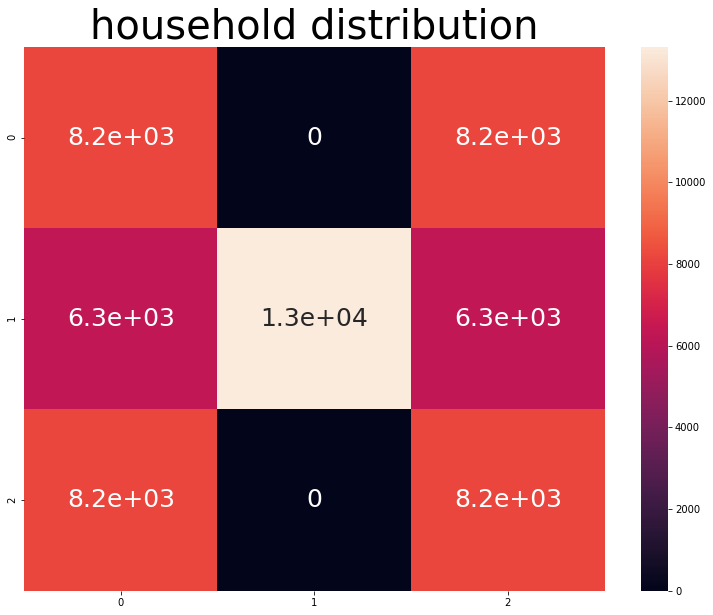

In [237]:
plt.figure(figsize=(13,10))
sn.heatmap(df_household,annot=True,annot_kws={'size':25})
plt.title('household distribution',fontdict={'fontsize':40})


We can see that households are distributed mainly in centrial area, but 2, 8 areas have no residents cause there are large basic employment area.

Text(0.5, 1.0, 'employment distribution')

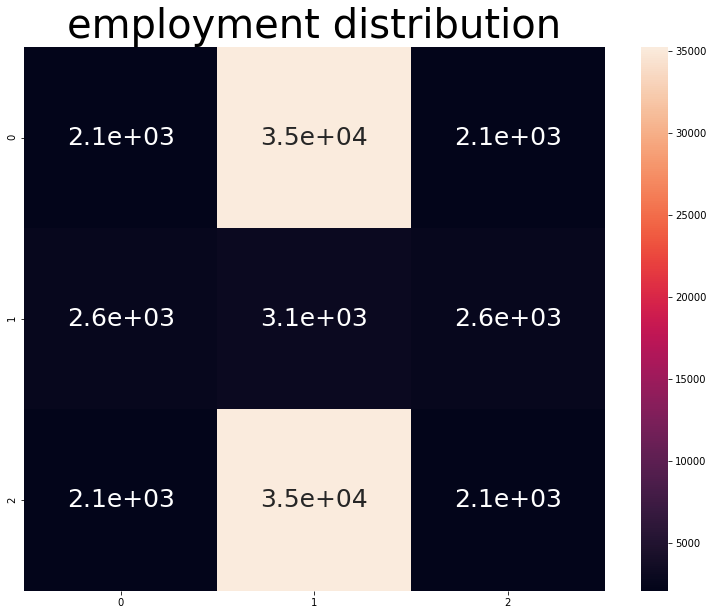

In [238]:
plt.figure(figsize=(13,10))
sn.heatmap(df_employment,annot=True,annot_kws={'size':25})
plt.title('employment distribution',fontdict={'fontsize':40})

By contrast, 2 and 8 hold the largest employment size, while the corner has fewer.

## conclusion of second model　(with change of parameter)

In [0]:
dic2={'household':Nj55,'Employment':Ej55,'Retail 1':Ejk55[0],'Retail 2':Ejk55[1],'X axis':[1,2,3,1,2,3,1,2,3],'Y axis':[1,1,1,2,2,2,3,3,3]}
df2=pd.DataFrame(dic2,index=range(1,10))

In [240]:
df2# the overall distribution among areas

,household,Employment,Retail 1,Retail 2,X axis,Y axis
1,8749.833787,2602.556239,1487.174994,1115.381245,1,1
2,5015.000000,31769.337094,4183.139183,2586.197911,2,1
3,8749.833787,2602.556239,1487.174994,1115.381245,3,1
4,7687.561963,3030.984213,1731.990979,1298.993234,1,2
5,12631.947272,3432.267907,1961.295947,1470.971960,2,2
6,7687.561963,3030.984213,1731.990979,1298.993234,3,2
7,8749.833787,2602.556239,1487.174994,1115.381245,1,3
8,5015.000000,31769.337094,4183.139183,2586.197911,2,3
9,8749.833787,2602.556239,1487.174994,1115.381245,3,3


In [0]:
df_household2=np.array(df2['household']).reshape(3,3)
df_employment2=np.array(df2['Employment']).reshape(3,3)

Text(0.5, 1.0, 'household distribution')

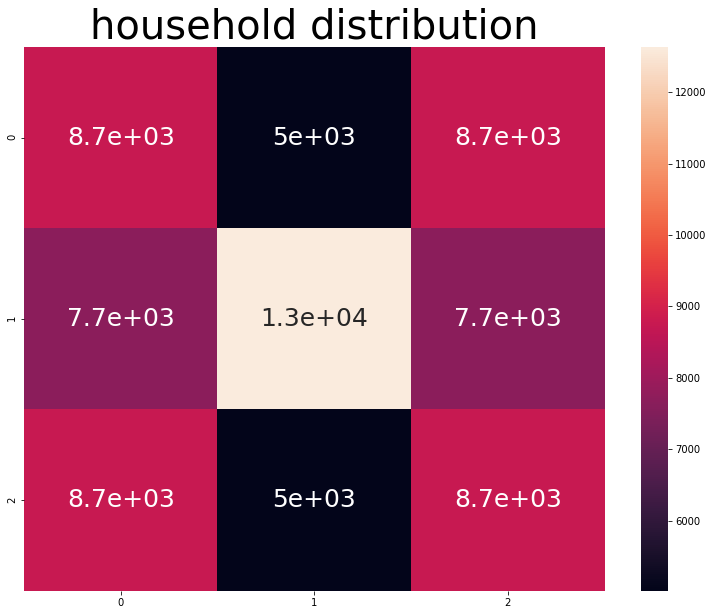

In [244]:
plt.figure(figsize=(13,10))
sn.heatmap(df_household2,annot=True,annot_kws={'size':25})
plt.title('household distribution',fontdict={'fontsize':40})


Text(0.5, 1.0, 'employment distribution')

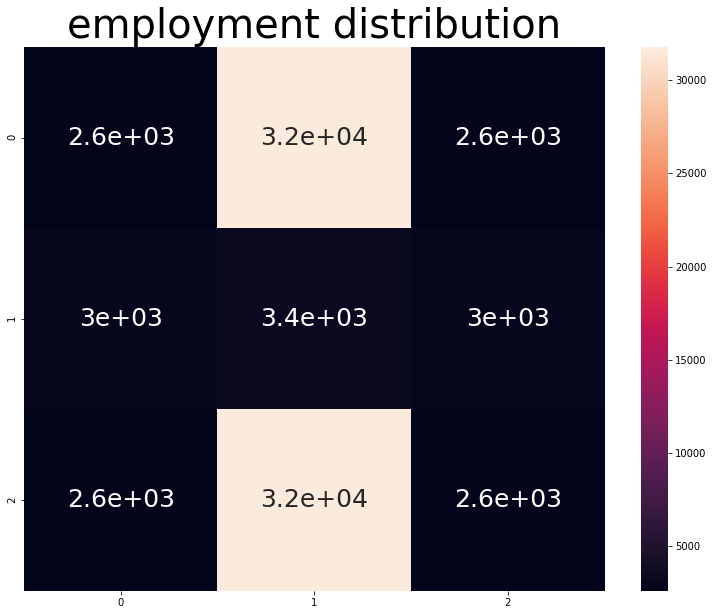

In [245]:
plt.figure(figsize=(13,10))
sn.heatmap(df_employment2,annot=True,annot_kws={'size':25})
plt.title('employment distribution',fontdict={'fontsize':40})

# Some conclusions

1:
In the first model, we got the result after 5 iterations. We can see the basic employment in area #2 and #8 make household tend to live in other places.And the employment of these two places are large--not only the basic employment but also the retail employment

The central area has the largest population and second largest employment, while the corner area have some population and employment.

2:
In the second model, due to the decrease of impedance parameter, people tend to move from place to place.

So the #2 and #8 area attract some residents but still fewest. And the total population get larger compare to first model.

As for the employment, also easily to compare from the heatplots: we found that #2 and #8 still have the largest employment, but the difference from other grids is smaller. Also, the total employment increase.

Overall, it is clear that low impedance between city areas is good for development: city can attract more population and employment, while the difference between grids(places) is smaller.